<a href="https://colab.research.google.com/github/efemeryczny/banking_network_analysis/blob/main/shareholders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/Google_drive/shareholders.xlsm'
data = pd.read_excel(excel_file_path)
data

,Company,Ticker,Shareholder,Ownership,Shareholder - Direct %\n12/2021,Shareholder - Direct %\n12/2020,Shareholder - Direct %\n12/2019,Shareholder - Direct %\n12/2018,Shareholder - Direct %\n12/2017,Shareholder - Direct %\n12/2016,Shareholder - Direct %\n12/2015,Shareholder - Direct %\n12/2014,Shareholder - Direct %\n12/2013
0,POLSKI KONCERN NAFTOWY ORLEN SA.,PKN,MINISTERSTWO FINANSOW,49.90,32.42,27.52,27.52,27.52,27.52,27.52,27.52,27.52,27.52
1,POLSKI KONCERN NAFTOWY ORLEN SA.,PKN,NATIONALE-NEDERLANDEN OTWARTY FUNDUSZ EMERYTALNY,7.34,7.34,7.61,7.61,8.32,7.01,9.30,9.35,9.35,5.02
2,POLSKI KONCERN NAFTOWY ORLEN SA.,PKN,NATIONALE-NEDERLANDEN POWSZECHNE TOWARZYSTWO E...,7.33,7.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,POLSKI KONCERN NAFTOWY ORLEN SA.,PKN,AVIVA POWSZECHNE TOWARZYSTWO EMERYTALNE AVIVA ...,6.28,6.43,6.41,6.41,6.41,6.62,7.31,0.00,0.00,0.00
4,POLSKI KONCERN NAFTOWY ORLEN SA.,PKN,OTHERS,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,MILKILAND N.V.,MLK,MR. ANATOLIY YURKEVYCH AND MRS. OLGA YURKEVICH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985,MILKILAND N.V.,MLK,MR. VYACHESLAV REKOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2986,MILKILAND N.V.,MLK,DRUGI ALLIANZ POLSKA OTWARTY FUNDUSZ EMERYTALNY,2.88,2.88,2.88,2.88,2.88,5.74,5.74,5.74,5.74,5.00
2987,MILKILAND N.V.,MLK,R-ASSETS COöPERATIEF U.A.,0.00,0.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.74


In [7]:
G = nx.from_pandas_edgelist(data, 'Ticker', 'Shareholder', edge_attr=True)

In [8]:
edgelist = nx.to_edgelist(G)

In [10]:
colors = ['red' if node in data['Shareholder'].values else 'blue' for node in G]

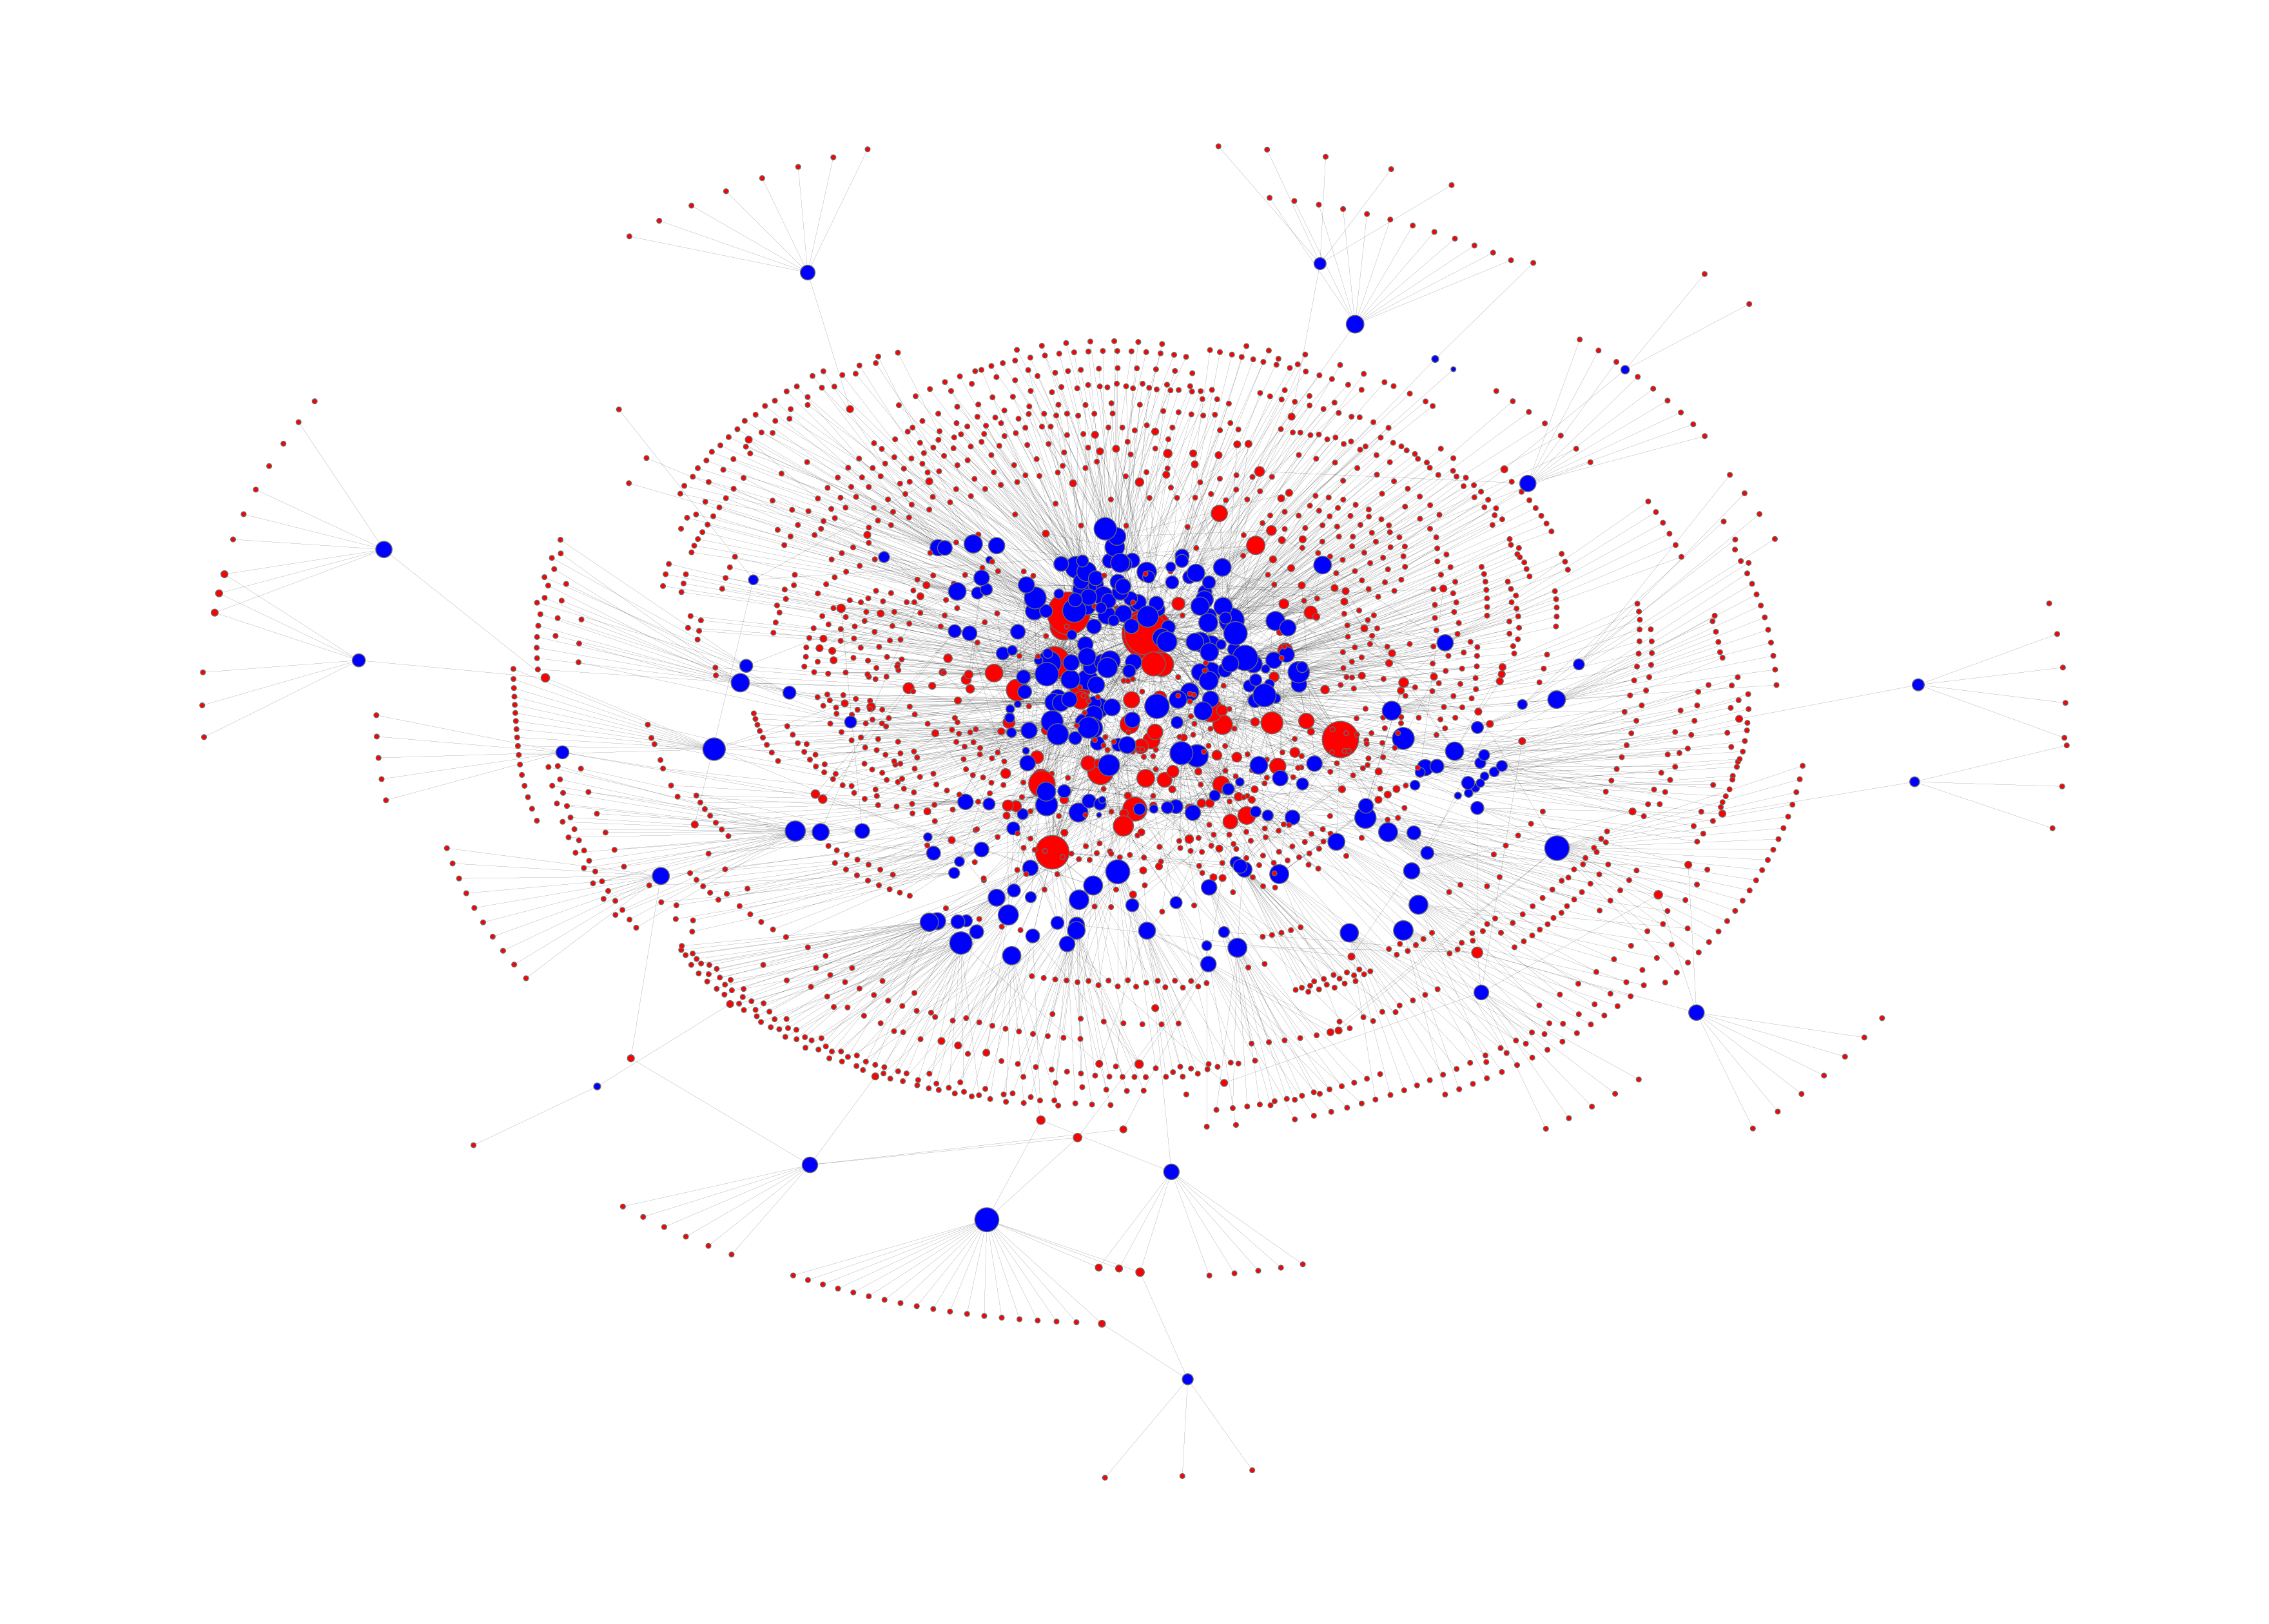

In [12]:
plt.figure(figsize=(35, 25))
min_value=0.1
nx.draw_kamada_kawai(G, with_labels=False, node_color=colors,
        node_size = [v * 30 for v in dict(G.degree()).values()],
        width=[max(v[2]['Ownership']/1000000000000, min_value) for v in edgelist],
        edgecolors='#696969')
plt.show()